## To-Do:

## Run on First run only

In [27]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/sgupta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sgupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
!wget -P ./assets/ https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
!unzip ./assets/glove.6B.zip -d ./assets/

Archive:  ./assets/glove.6B.zip
  inflating: ./assets/glove.6B.50d.txt  
  inflating: ./assets/glove.6B.100d.txt  
  inflating: ./assets/glove.6B.200d.txt  
  inflating: ./assets/glove.6B.300d.txt  


## Imports

In [1]:
display_width = 100 # in percentage

from IPython.display import display, HTML
display(HTML("<style>.container { width:"+str(display_width)+"% !important; }</style>"))

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("/Users/sudhanshugupta/Library/Python/3.9/lib/python/site-packages")

In [4]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from EDA import EDA_movie_reviews
from preprocessing import preprocMovieReview
from feature_extraction import textVectorizer, GloveVectorizer
from utils import train_val_test_split, compare_performances_across_classifiers
from classification import LogisticRegressionClf, BiLSTMClf, DistilBERTClassifier

2023-09-03 15:26:16.157345: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-03 15:26:16.803626: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-09-03 15:26:16.803714: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-09-03 15:26:16.803720: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

# Read Data

In [6]:
df_movie_reviews = pd.read_csv("./data/movie_review_train.tsv", delimiter="\t")
df_movie_reviews.sample(10)

,id,sentiment,review
6603,11660_1,0,Keenan Ivory Wayans is probably one of the wor...
19219,9192_7,1,Let's start this review out on a positive note...
7892,1133_10,1,This is a delightful movie that is so over-the...
11630,6475_10,1,"It's only 2 episodes into a 5 part drama, but ..."
4516,4873_1,0,"This is definitely a stupid, bad-taste movie. ..."
14820,8405_9,1,I am proud to say I own an uncut copy of this ...
10252,6448_1,0,Creature Unknown is the right word for this mo...
18215,7608_4,0,I'll admit that I don't expect much from a Rog...
5776,3823_4,0,"For most younger viewers out there, they proba..."
7171,4320_8,1,This highly underrated film is (to me) what go...


## Basic Text Preprocessing

Removes special characters, tokenizes, removes stopwords and strips whitespace 

In [7]:
text_preprocessor = preprocMovieReview(df_movie_reviews['review'])
df_movie_reviews['review_clean'] = text_preprocessor.basic_text_sanitization_pipeline()

/home/sgupta/algorithms/cp_new/cluepoints-case/preprocessing.py:96: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  html_parser = BeautifulSoup(review_text, "html.parser")


In [8]:
df_movie_reviews['review_clean'].sample(3).values

array(['many would think stay away movie title stomach gory movies reading review anyhow borrowed video friend mine fell love movie immediately movie chock full wonderful gore plus usual ingredients make b movie add one hell viewing experience lover good quality experiences means watch great flick',
       'first explanation despite headline giving film 8 stars overall one best films ever made criticisms registered valid points also warned enjoy script really need appreciate neil simon brilliance finding wit within real human banter distinctively new york ear dialogue especially dry jewish love suffused sarcasm trouble accepting sarcasm expression love might trouble accepting optimism heart movie much warnings main point walter matthau flat perfect even beyond perfect movie never seen funnier touching matter time shows us hilariousness character refuses give big star self image insufferable attitudes even coherence decline also shows us vulnerable maybe even heartbreakingly scared pers

# Exploratory Data Analysis

In [9]:
eda = EDA_movie_reviews(df_movie_reviews, reviews_col='review_clean', target_col='sentiment')

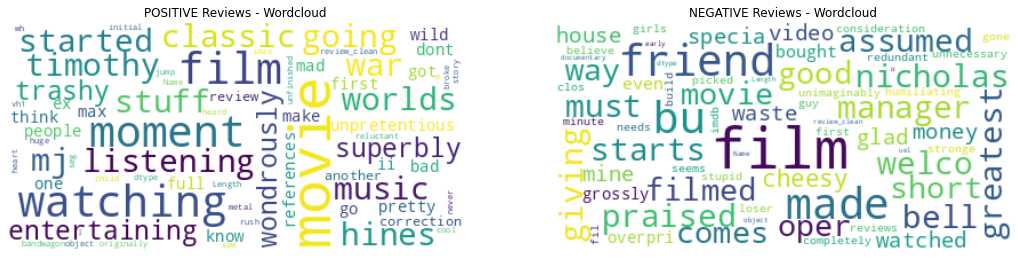

In [10]:
eda.visualize_wordcloud()

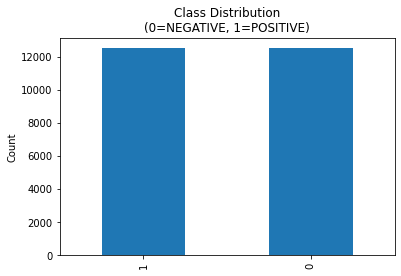

In [11]:
eda.visulaize_class_distribution()

In [12]:
eda.statistics_on_review_text()

Statistics on count of tokens per POSITIVE movie review


count    12500.000000
mean       123.490880
std         95.872217
min          7.000000
5%          31.000000
10%         44.000000
25%         63.750000
50%         90.000000
75%        152.000000
90%        251.000000
95%        325.000000
max       1429.000000
Name: n_tokens, dtype: float64

Statistics on count of tokens per NEGATIVE movie review


count    12500.000000
mean       118.570880
std         86.895436
min          4.000000
5%          35.000000
10%         49.000000
25%         65.000000
50%         89.000000
75%        143.000000
90%        229.100000
95%        297.000000
max        822.000000
Name: n_tokens, dtype: float64

***Conclusions***

1. **max_sequence_length of 150 will cover 75% of the sentences.**
2. **max_sequence_length of 300 will cover 95% of the sentences.**

In [13]:
eda.show_common_n_grams(n=3, show_count=20)

--------------------------------------------------
most common 3-grams for POSITIVE:
--------------------------------------------------
n_grams -- occurence_counts
('new', 'york', 'city') -- 115
('one', 'best', 'movies') -- 77
('world', 'war', 'ii') -- 72
('one', 'best', 'films') -- 63
('first', 'time', 'saw') -- 59
('movies', 'ever', 'seen') -- 56
('movie', 'ever', 'seen') -- 55
('rock', 'n', 'roll') -- 54
('based', 'true', 'story') -- 53
('first', 'saw', 'movie') -- 50
('well', 'worth', 'watching') -- 50
('films', 'ever', 'made') -- 46
('william', 'h', 'macy') -- 46
('would', 'love', 'see') -- 45
('40', 'year', 'old') -- 41
('daniel', 'day', 'lewis') -- 41
('movies', 'ever', 'made') -- 41
('highly', 'recommend', 'movie') -- 40
('best', 'movie', 'ever') -- 39
('international', 'film', 'festival') -- 38
--------------------------------------------------
most common 3-grams for NEGATIVE:
--------------------------------------------------
n_grams -- occurence_counts
('worst', 'movie', 'e

Initialize Dataframe to Store Classification Metrics

In [46]:
df_metrics = pd.DataFrame()

# Establish Baseline: TFIDF Vectorizer + Basic Classifier

TFIDF is a common vectorizer that takes into account only word counts. It does not model any kind of semantic similarity between words, but for basic classification tasks this can be good. It may suffer in cases such as when sarcasm in indicated. The Classifier used with TFIDF is Logistic Regression due to the simplicity in its implementation to establish a baseline performance.

In [14]:
(
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    X_val, 
    y_val
) = train_val_test_split(
    df_movie_reviews, 
    feature_cols='review_clean', 
    target_col='sentiment',
    test_percent=25, 
)

print(f"{X_train.shape}, {y_train.shape}, {X_test.shape}, {y_test.shape}, {X_val.shape}, {y_val.shape}")

In [42]:
tfidf_vectorizer = textVectorizer(vectorizer_type='tfidf')
X_train_tfidf = tfidf_vectorizer.apply_transform_train(X_train)
X_test_tfidf = tfidf_vectorizer.apply_transform_test(X_test)

print(X_train_tfidf.shape, X_test_tfidf.shape)

(17500, 10000) (3750, 10000)


In [ ]:
clf_logistic_regression = LogisticRegressionClf()
clf_logistic_regression.fit_classifier(X_train_tfidf, y_train)

In [43]:
y_pred = clf_logistic_regression.predict_classifier(X_test_tfidf)
precision_lr, recall_lr, f1_lr, accuracy_lr = clf_logistic_regression.evaluate_classifier(y_test, y_pred)

In [47]:
df_metrics = pd.concat([
    df_metrics,
    pd.DataFrame({
        "classifier": "logistic_regression",
        "precision": precision_lr,
        "recall": recall_lr,
        "f1": f1_lr,
        "accuracy": accuracy_lr,
    }, index=[0])
])
df_metrics

,classifier,precision,recall,f1,accuracy
0,logistic_regression,0.646124,0.721505,0.681737,0.665867


# Improved Classifier: TFIDF Vectorizer + BiLSTM

An improved BiLSTM classifier is is used in an attempt to improve model performance. BiLSTMs are adept at comprehending contextual nuances through bidirectional text processing, taking into account both preceding and succeeding words. This capability makes it suitable for capturing the intricacies of sentiment within sentences. Furthermore, BiLSTMs are capable of capturing long-range dependencies between words, which is essential for understanding the sentiment of complex sentences where the sentiment may change or be influenced by distant words.

In [49]:
(
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    X_val, 
    y_val
) = train_val_test_split(
    df_movie_reviews, 
    feature_cols='review_clean', 
    target_col='sentiment',
    test_percent=15, 
    val_percent=15,
)

print(f"{X_train.shape}, {y_train.shape}, {X_test.shape}, {y_test.shape}, {X_val.shape}, {y_val.shape}")

(17500,), (17500,), (3750,), (3750,), (3750,), (3750,)


In [50]:
embedding_dim = 1
vocab_size = 1000 # making this smaller to speed up training
max_sequence_length = vocab_size

In [51]:
tfidf_vectorizer = textVectorizer(vectorizer_type='tfidf', vocab_size=vocab_size)
X_train_tfidf = tfidf_vectorizer.apply_transform_train(X_train).toarray().reshape(-1, len(X_train), vocab_size).transpose(1, 2, 0)
X_test_tfidf = tfidf_vectorizer.apply_transform_test(X_test).toarray().reshape(-1, len(X_test), vocab_size).transpose(1, 2, 0)
X_val_tfidf = tfidf_vectorizer.apply_transform_test(X_val).toarray().reshape(-1, len(X_val), vocab_size).transpose(1, 2, 0)

print(X_train_tfidf.shape, X_test_tfidf.shape, X_val_tfidf.shape)

(17500, 1000, 1) (3750, 1000, 1) (3750, 1000, 1)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 1000, 256)        133120    
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 1000, 128)        164352    
 nal)                                                            
                                                                 
 global_max_pooling1d_3 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                      

INFO:tensorflow:Assets written to: ./assets/20230903170237_BiLSTM_classifier/assets


INFO:tensorflow:Assets written to: ./assets/20230903170237_BiLSTM_classifier/assets


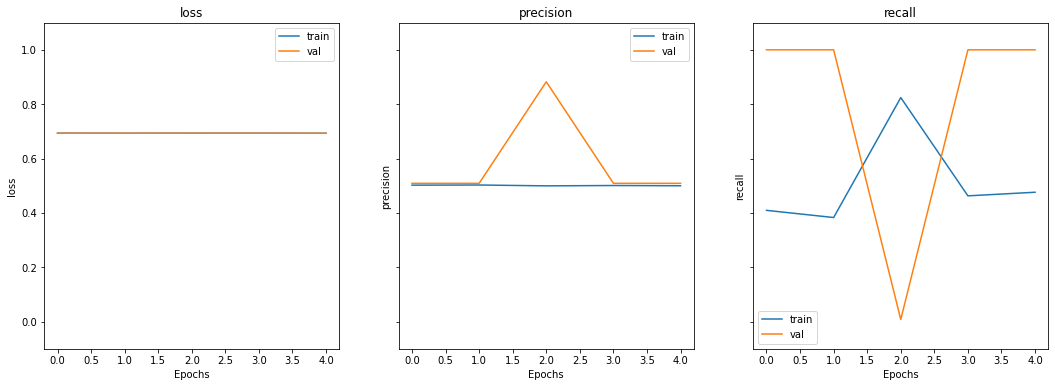

In [54]:
HIDDEN_ACTIVATION = 'relu'
MAX_EPOCHS = 5
LR_INIT = 1e-3
BATCH_SIZE = 256
L2_REG_PENALTY = 1e-3
CALLBACKS = ["es", "rlrop", "tensorboard"]
VERBOSITY_LEVEL = 2
SAVE_DIR = "./assets/"


clf_bilstm = BiLSTMClf(
        embedding_dim,
        vocab_size,
        max_sequence_length,
        HIDDEN_ACTIVATION,
        MAX_EPOCHS,
        LR_INIT,
        BATCH_SIZE,
        L2_REG_PENALTY,
        CALLBACKS,
        VERBOSITY_LEVEL,
        SAVE_DIR,
)

clf_bilstm.fit_classifier(X_train_tfidf, y_train, X_val_tfidf, y_val)

In [55]:
y_pred = clf_bilstm.predict_classifier(X_test_tfidf)
precision_bilstm_tfidf, recall_bilstm_tfidf, f1_bilstm_tfidf, accuracy_bilstm_tfidf = clf_bilstm.evaluate_classifier(y_test, y_pred)

118/118 [==============================] - 27s 225ms/step


In [56]:
df_metrics = pd.concat([
    df_metrics,
    pd.DataFrame({
        "classifier": "bilstm_tfidf",
        "precision": precision_bilstm_tfidf,
        "recall": recall_bilstm_tfidf,
        "f1": f1_bilstm_tfidf,
        "accuracy": accuracy_bilstm_tfidf,
    }, index=[0])
])
df_metrics

,classifier,precision,recall,f1,accuracy
0,logistic_regression,0.646124,0.721505,0.681737,0.665867
0,bilstm_tfidf,0.491200,1.000000,0.658798,0.491200


# Improved Embeddings: GloVe + BiLSTM

Pre-trained GloVe word embeddings provide a way to initialize the model with rich semantic representations of words. This helps the model understand the meaning of words and their relationships, even with limited training data. Using pre-trained embeddings like GloVe can significantly reduce the need for large amounts of labeled data, as in the case of this problem. The model can leverage the knowledge encoded in GloVe embeddings and fine-tune its parameters on this specific task.

In [57]:
(
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    X_val, 
    y_val
) = train_val_test_split(
    df_movie_reviews, 
    feature_cols='review_clean', 
    target_col='sentiment',
    test_percent=15, 
    val_percent=15,
)

print(f"{X_train.shape}, {y_train.shape}, {X_test.shape}, {y_test.shape}, {X_val.shape}, {y_val.shape}")

(17500,), (17500,), (3750,), (3750,), (3750,), (3750,)


In [58]:
embedding_dim = 50
vocab_size = 50000
max_sequence_length = 500
glove_emb_path = f"./assets/glove.6B.{embedding_dim}d.txt"

In [59]:
glove_vectorizer = GloveVectorizer(embedding_dim, vocab_size, max_sequence_length, glove_emb_path)

X_train_glove = glove_vectorizer.vectorize_text(X_train)
X_test_glove = glove_vectorizer.vectorize_text(X_test)
X_val_glove = glove_vectorizer.vectorize_text(X_val)

print(X_train_glove.shape, X_test_glove.shape, X_val_glove.shape)

(17500, 500, 50) (3750, 500, 50) (3750, 500, 50)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_8 (Bidirectio  (None, 500, 128)         58880     
 nal)                                                            
                                                                 
 global_max_pooling1d_4 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 67,201
Trainable params: 67,201
Non-trai

INFO:tensorflow:Assets written to: ./assets/20230903172322_BiLSTM_classifier/assets


INFO:tensorflow:Assets written to: ./assets/20230903172322_BiLSTM_classifier/assets


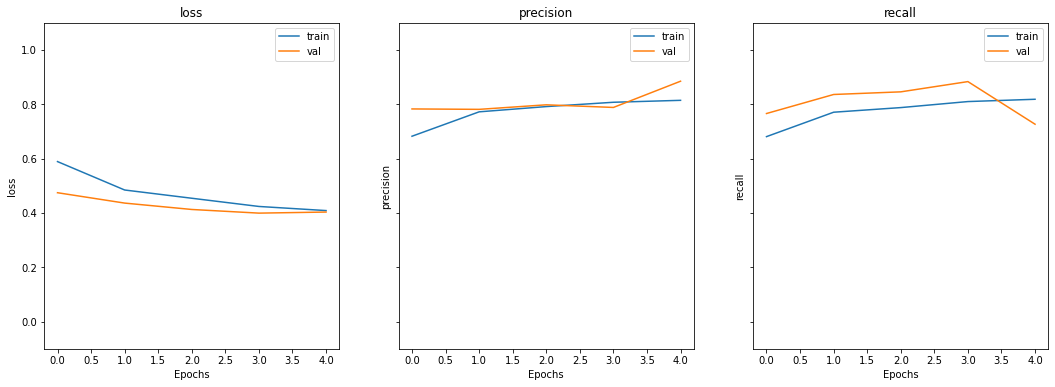

In [60]:
HIDDEN_ACTIVATION = 'relu'
MAX_EPOCHS = 5
LR_INIT = 1e-3
BATCH_SIZE = 256
L2_REG_PENALTY = 1e-3
CALLBACKS = ["es", "rlrop", "tensorboard"]
VERBOSITY_LEVEL = 2
SAVE_DIR = "./assets/"

clf_bilstm_glove = BiLSTMClf(
    embedding_dim,
        vocab_size,
        max_sequence_length,
        HIDDEN_ACTIVATION,
        MAX_EPOCHS,
        LR_INIT,
        BATCH_SIZE,
        L2_REG_PENALTY,
        CALLBACKS,
        VERBOSITY_LEVEL,
        SAVE_DIR,
)

clf_bilstm_glove.fit_classifier(X_train_glove, y_train, X_val_glove, y_val)

In [61]:
y_pred = clf_bilstm_glove.predict_classifier(X_test_glove)
precision_bilstm_glove, recall_bilstm_glove, f1_bilstm_glove, accuracy_bilstm_glove = clf_bilstm_glove.evaluate_classifier(y_test, y_pred)

118/118 [==============================] - 9s 73ms/step


In [62]:
df_metrics = pd.concat([
    df_metrics,
    pd.DataFrame({
        "classifier": "bilstm_glove",
        "precision": precision_bilstm_glove,
        "recall": recall_bilstm_glove,
        "f1": f1_bilstm_glove,
        "accuracy": accuracy_bilstm_glove,
    }, index=[0])
])
df_metrics

,classifier,precision,recall,f1,accuracy
0,logistic_regression,0.646124,0.721505,0.681737,0.665867
0,bilstm_tfidf,0.491200,1.000000,0.658798,0.491200
0,bilstm_glove,0.902913,0.687797,0.780810,0.805067


# Improved Embeddings and Classifier: DistilBERT Classifier

BERT is used as in improvement over BiLSTM+GloVe in this final section because, it is a pre-trained transformer-based model that comes with pre-learned contextual word representations. It eliminates the need for manual feature engineering and complex architectures like BiLSTMs. BERT can be fine-tuned for sentiment analysis with minimal effort. Here, DistilBERT is used instead of BERT because DistilBERT offers similar performance to BERT but with reduced computational complexity and memory requirements, making it a more efficient choice for many NLP tasks. DistilBERT simplifies sentiment classification, offers excellent performance, and is computationally efficient (if you have nice GPU only :p), making it a great choice for this task. 

**Improvement Idea:** use DistilBERT trained on rotten tomatoes sentiment classification dataset for transfer learning

In [65]:
(
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    X_val, 
    y_val
) = train_val_test_split(
    df_movie_reviews, 
    feature_cols='review_clean', 
    target_col='sentiment',
    test_percent=15, 
    val_percent=15,
)

print(f"{X_train.shape}, {y_train.shape}, {X_test.shape}, {y_test.shape}, {X_val.shape}, {y_val.shape}")

(17500,), (17500,), (3750,), (3750,), (3750,), (3750,)


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'pre_classifier.weight', 'classifier.bias', 'classifier.we

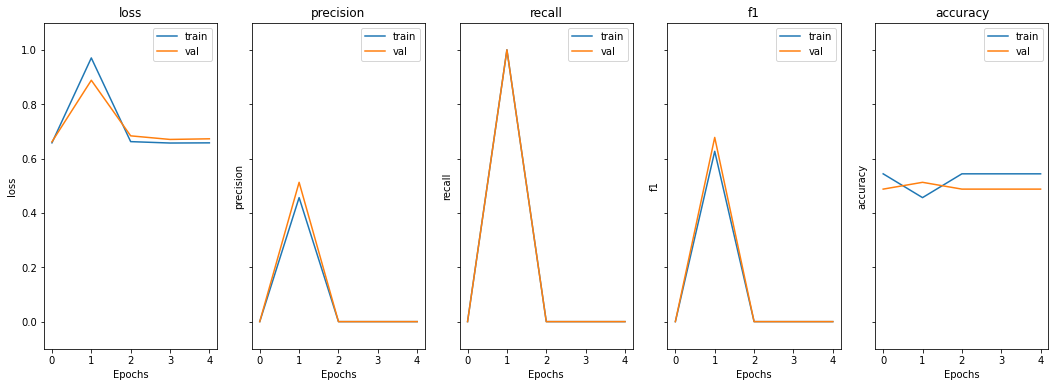

Model Saved at: ./assets/20230903174400_DistilBERT_classifier


In [68]:
BATCH_SIZE = 8
N_EPOCHS = 5
MAX_SEQUENCE_LEN = 150
SAVE_DIR = "./assets/"

clf_distilbert = DistilBERTClassifier()
clf_distilbert.fit_classifier(
    X_train, y_train, 
    X_val, y_val, 
    batch_size=BATCH_SIZE, n_epochs=N_EPOCHS,
    max_sequence_len=MAX_SEQUENCE_LEN,
    SAVE_DIR=SAVE_DIR,
)

In [70]:
y_pred = clf_distilbert.predict_classifier(X_test)
precision_distilbert, recall_distilbert, f1_distilbert, accuracy_distilbert = clf_distilbert.evaluate_classifier(y_test, y_pred)

/home/sgupta/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
df_metrics = pd.concat([
    df_metrics,
    pd.DataFrame({
        "classifier": "distilbert",
        "precision": precision_distilbert,
        "recall": recall_distilbert,
        "f1": f1_distilbert,
        "accuracy": accuracy_distilbert,
    }, index=[0])
])
df_metrics

,classifier,precision,recall,f1,accuracy
0,logistic_regression,0.646124,0.721505,0.681737,0.665867
1,bilstm_tfidf,0.491200,1.000000,0.658798,0.491200
2,bilstm_glove,0.902913,0.687797,0.780810,0.805067
0,distilbert,0.000000,0.000000,0.000000,0.462500


### Clear GPU Memory if needed

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
print(torch.cuda.memory_summary(device=None, abbreviated=False))

# Compare Classifiers

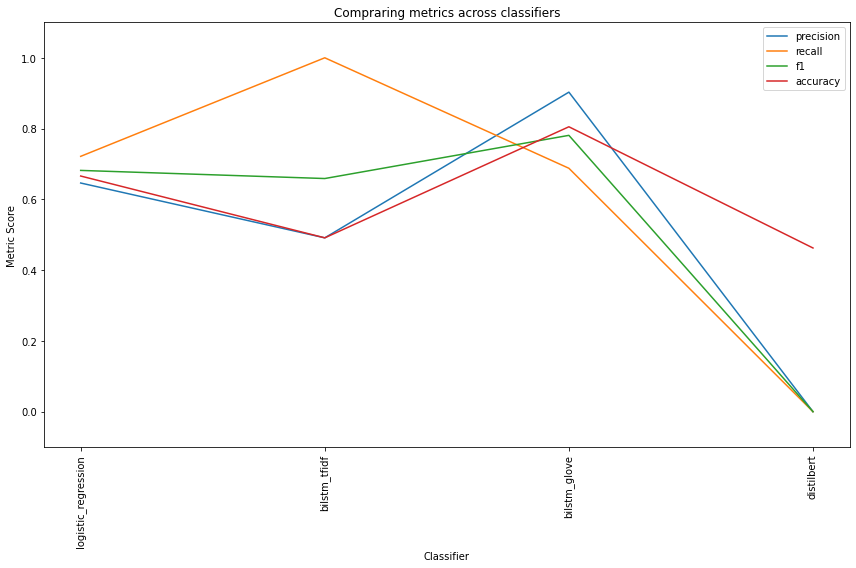

In [72]:
compare_performances_across_classifiers(df_metrics)